# KNN Regression

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# Problem Statement

In [ ]:
Predict the price of houses in Boston City by using KNN algorithms.

# Data gathering

In [6]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Train Test Split

In [9]:
x = df.drop("PRICE", axis = 1)
y = df['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 7)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
205,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08


# Model Training

In [10]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

# Model Evaluation

In [15]:
# Testing Dataset

y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 40.725077165354335
****************************************
RMSE : 6.381620261763805
****************************************
MAE : 4.519685039370079
****************************************
R Squared : 0.4715358579444636


In [16]:
# Training Dataset

y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 25.2812073878628
****************************************
RMSE : 5.028042102833149
****************************************
MAE : 3.4392612137203167
****************************************
R Squared : 0.7089000053363527


#### Check accuracy by manual Way

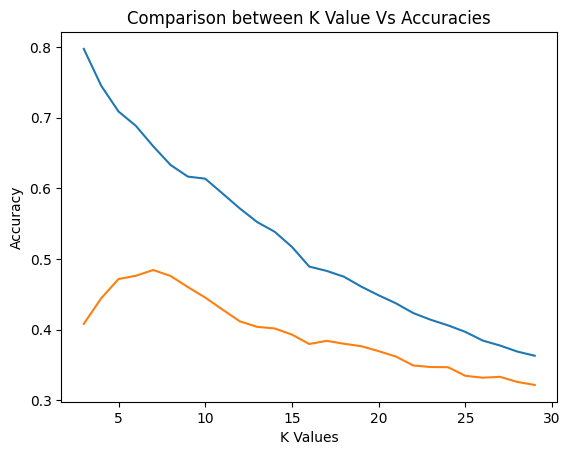

In [24]:
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p= 2)
    knn_reg.fit(x_train, y_train)
    
    r2_score_train = knn_reg.score(x_train, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=2.jpeg")

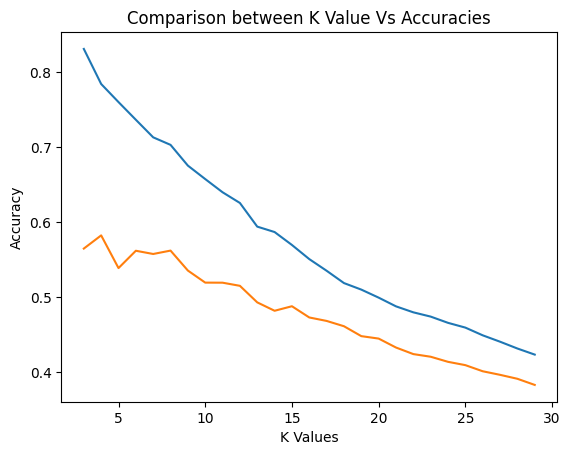

In [25]:
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p= 1)
    knn_reg.fit(x_train, y_train)
    
    r2_score_train = knn_reg.score(x_train, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=1.jpeg")

# Feature Engineering

## 1. Normalization

In [27]:
# Instance
normal_scalar = MinMaxScaler()

array = normal_scalar.fit_transform(x_train)

x_train_normal_df = pd.DataFrame(array, columns=x_train.columns)

knn_reg = KNeighborsRegressor(n_neighbors=7, p=1)
knn_reg.fit(x_train_normal_df, y_train)

MSE : 20.5317419251165
****************************************
RMSE : 4.5311965224559065
****************************************
MAE : 3.013835770528683
****************************************
R Squared : 0.7335722818324591


In [29]:
# Testing Dataset
array = normal_scalar.transform(x_test)
x_test_normal_df = pd.DataFrame(array, columns=x_test.columns)
########################################################
y_pred = knn_reg.predict(x_test_normal_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 20.5317419251165
****************************************
RMSE : 4.5311965224559065
****************************************
MAE : 3.013835770528683
****************************************
R Squared : 0.7335722818324591


In [28]:
# Training Dataset

y_pred_train = knn_reg.predict(x_train_normal_df)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 17.666436917775023
****************************************
RMSE : 4.203146073808883
****************************************
MAE : 2.6753109687146623
****************************************
R Squared : 0.7965801390103339


#### Check accuracy by manual Way

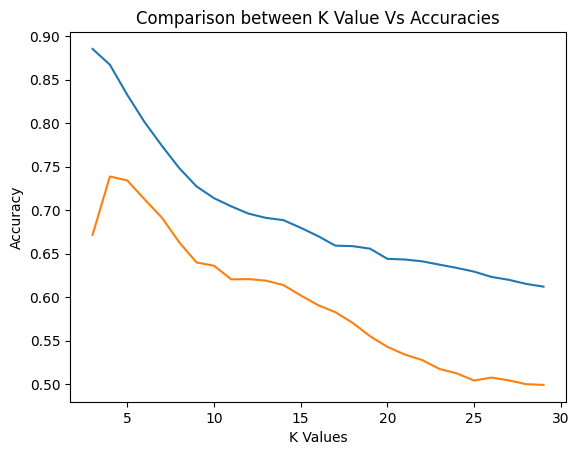

In [30]:
# When p = 2
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p= 2)
    knn_reg.fit(x_train_normal_df, y_train)
    
    r2_score_train = knn_reg.score(x_train_normal_df, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test_normal_df, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=2.jpeg")

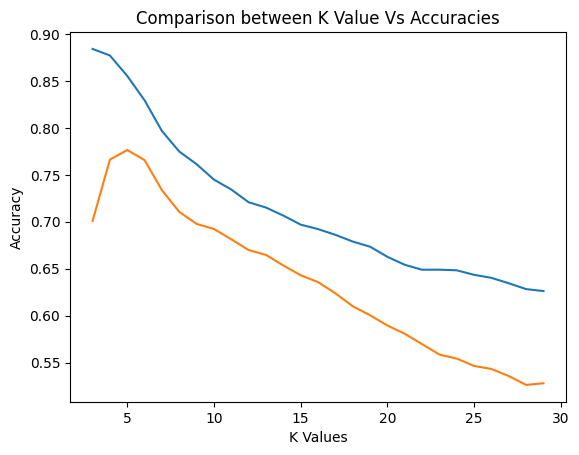

In [31]:
# When p = 1
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p = 1)
    knn_reg.fit(x_train_normal_df, y_train)
    
    r2_score_train = knn_reg.score(x_train_normal_df, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test_normal_df, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=1.jpeg")

## 2. Standardization

In [33]:
# Instance
std_scalar = StandardScaler()

array = std_scalar.fit_transform(x_train)

x_train_std_df = pd.DataFrame(array, columns=x_train.columns)

knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_std_df, y_train)

KNeighborsRegressor()

In [34]:
# Testing Dataset
array = std_scalar.transform(x_test)
x_test_std_df = pd.DataFrame(array, columns=x_test.columns)

########################################################

y_pred = knn_reg.predict(x_test_std_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 19.580242519685054
****************************************
RMSE : 4.424956781674263
****************************************
MAE : 2.8672440944881887
****************************************
R Squared : 0.74591930121111


In [35]:
# Training Dataset

y_pred_train = knn_reg.predict(x_train_std_df)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 13.171382585751978
****************************************
RMSE : 3.62923994601514
****************************************
MAE : 2.3035883905013192
****************************************
R Squared : 0.8483383589398501


#### Check accuracy by manual Way

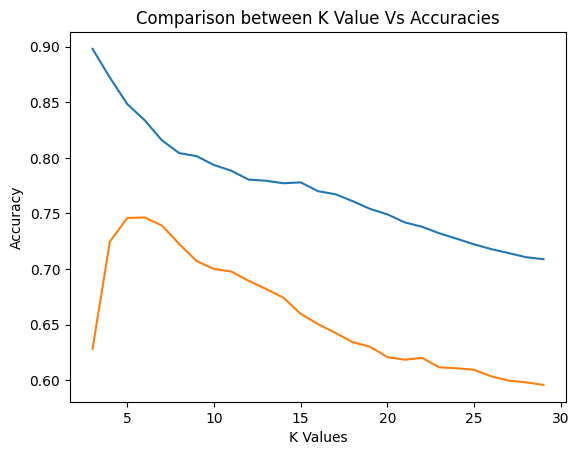

In [36]:
# When p = 2
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p= 2)
    knn_reg.fit(x_train_std_df, y_train)
    
    r2_score_train = knn_reg.score(x_train_std_df, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test_std_df, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=2.jpeg")

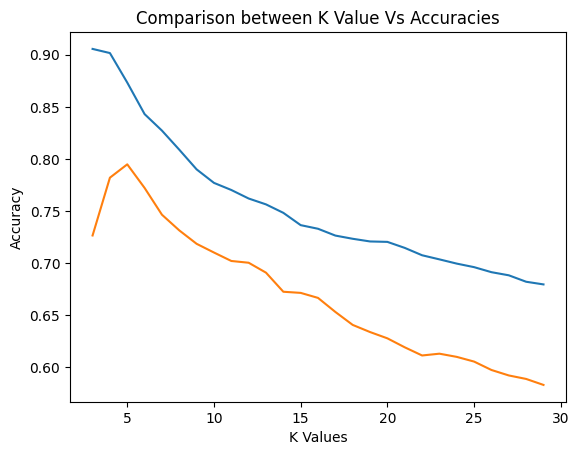

In [38]:
# When p = 1
r2_train_list = []
r2_test_list = []
k_value = range(3,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p = 1)
    knn_reg.fit(x_train_std_df, y_train)
    
    r2_score_train = knn_reg.score(x_train_std_df, y_train)
    r2_train_list.append(r2_score_train)
    
    r2_score_test = knn_reg.score(x_test_std_df, y_test)
    r2_test_list.append(r2_score_test)
    

plt.plot(k_value, r2_train_list)
plt.plot(k_value, r2_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=1.jpeg")

# Pickle File

In [48]:
knn_reg = KNeighborsRegressor(n_neighbors=7, p=1)

knn_reg.fit(x_train_std_df, y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [49]:
with open("KNN_model.pkl", "wb") as f:
    pickle.dump(knn_reg, f)

In [43]:
std_scalar

StandardScaler()

In [44]:
with open("Scaling.pkl", "wb") as f:
    pickle.dump(std_scalar, f)

In [46]:
x_test.iloc[1]

CRIM         0.03041
ZN           0.00000
INDUS        5.19000
CHAS         0.00000
NOX          0.51500
RM           5.89500
AGE         59.60000
DIS          5.61500
RAD          5.00000
TAX        224.00000
PTRATIO     20.20000
B          394.81000
LSTAT       10.56000
Name: 337, dtype: float64

In [47]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')